# Plot and analyze anisotropy data (AMS)

The anisotropy of magnetic susceptibility and remanence can give significant insight to geological processes. Phenomena such as sedimentary deposition, magma flow, and deformation can all lead to preferred orientations of magnetic minerals. Such "magnetic fabrics'' give rise to anisotropy. Additionally, paleomagnetic vectors can be influenced by magnetic fabrics in their direction and intensity which further motivates efforts to quantify anisotropy.

This notebook is focused on one of the most common types of anisotropy data which is anisotropy of magnetic susceptibility (AMS). The anisotropy of anhysteretic remanence (AARM) will be dealt with in a separate notebook.

## Introduction to anisotropy of magnetic susceptibility (AMS)

Magnetic susceptibility describes the relationship between an applied magnetic field and the magnetization that is induced by this field:

$M = \chi H$

where $M$ is the magnetization (in Am<sup>2</sup>/kg), $H$ is the applied field (in A/m), and $\chi$ is the magnetic susceptibility (this is the mass susceptibility in m<sup>3</sup>/kg). Magnetic susceptibility reflects the diamagnetic, paramagnetic, and/or ferromagnetic response of minerals within a sample.

If a material is perfectly isotropic, the relationship described by $\chi$ is independent of the orientation of the sample relative to the applied field. However, if there is a different response in different orientations the material can be considered to be anisotropic. 

In practice, AMS is quantified by varying the orientation of a sample within the coils of a magnetic susceptibility bridge. By doing so, the length and orientation of the principal, major, and minor eigenvectors can be determined where:

$V_1 \geq V_2 \geq V_3$

these eigenvectors are also referred to in the literature as:

$K_{max} \geq K_{int} \geq K_{min}$

and the anisotropy of magnetic susceptibility ellipsoid can be illustrated as:

<figure>
  <img src="https://raw.githubusercontent.com/PmagPy/RockmagPy-notebooks/main/book/images/AMS.png" alt="Description of the image" width="450">
  <figcaption>from https://www.agico.cz/downloads/documents/agicoprints/ams_rocks_pres.pdf </figcaption>
</figure>

In the above plot, the axes of the ellipsoid are the eigenvectors (commonly referred to as the “principal axes”) with their magnitudes corresponding to the eigenvalues. Collectively, the eigenvalues and eigenvectors are called the eigenparameters. The orientation of this ellipsoid and the relative magnitude of the eigenvectors is central to the interpretation of AMS data. 

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb

import matplotlib.pyplot as plt
%matplotlib inline

## Import data

We will download data from a MagIC contribution associated with the study: 

> Schwehr and Tauxe (2003). Characterization of soft-sediment deformation: Detection of cryptoslumps using magnetic methods. Geology 31 (3):203. doi:10.1130/0091-7613(2003)031<0203:COSSDD>2.0.CO;2.

The MagIC formated data for that study can be found here: https://earthref.org/MagIC/19571. We can use the MagIC id of `19571` to download the data from MagIC using the `ipmag.download_magic_from_id()` function.

We will set the directory, download the file from MagIC (using `ipmag.download_magic_from_id()`), unpack the MagIC file into its constituent tables (using `ipmag.unpack_magic`), and make those tables into a Contribution object (using `cb.Contribution()`).

In [2]:
dir_path = 'example_data/anisotropy_slump'
result, magic_file = ipmag.download_magic_from_id('19571', directory=dir_path)
ipmag.unpack_magic(magic_file, dir_path)
contribution = cb.Contribution(dir_path)

Download successful. File saved to: example_data/anisotropy_slump/magic_contribution_19571.txt
working on:  'contribution'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
contribution  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
working on:  'locations'
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
locations  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
working on:  'sites'
6  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
sites  data put in  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
working on:  'samples'
17  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/anisotropy_slump/samples.tx

## Inspect data

Let's have a look at the anisotropy data which are provided at the specimen level in the specimens table. Of particular importance is the `aniso_s` column. This column is the anisotropy tensor diagonal elements as a six-element colon-delimited list.

In [3]:
specimens = contribution.tables['specimens'].df
specimens.dropna(axis=1, how='all').head() # see the first 5 measurements without empty columns

,aniso_s,aniso_s_mean,aniso_s_n_measurements,aniso_s_sigma,aniso_s_unit,aniso_type,citations,geologic_classes,geologic_types,lithologies,method_codes,sample,specimen
specimen name,,,,,,,,,,,,,
as1a1,0.34406999:0.34145039:0.31447965:-0.00168019:0...,0.000250,15,0.000525,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a1
as1a2,0.34351686:0.34047559:0.31600755:-0.00129778:0...,0.000229,15,0.000781,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a2
as1a3,0.34317553:0.34108347:0.315741:-0.00083286:0.0...,0.000235,15,0.000366,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a3
as1b1,0.34141964:0.34004751:0.31853285:-0.0005353:0....,0.000241,15,0.000546,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1b,as1b1
as1b2,0.34097505:0.34068653:0.31833842:-0.00101421:0...,0.000230,15,0.000482,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1b,as1b2


The `aniso_s` list is a succinct representation of the anisotropy tensor $\chi$. In the linear equations below, $M_1$, $M_2$, and $M_3$ are the components of the magnetization vector $M$. The relationship between the magnetization and the magnetic field ($H_1$, $H_2$, and $H_3$) is described by the components of the magnetic susceptibility tensor $\chi_{ij}$. If the material is anisotropic, there will be different values in different orientations described by the $\chi$ tensor.

$ M_1 = \chi_{11} H_1 + \chi_{12} H_2 + \chi_{13} H_3 $

$ M_2 = \chi_{21} H_1 + \chi_{22} H_2 + \chi_{23} H_3 $

$ M_3 = \chi_{31} H_1 + \chi_{32} H_2 + \chi_{33} H_3 $

This susceptibility tensor has six independent matrix elements because $\chi_{ij} = \chi_{ji}$. The `aniso_s` column contains these six elements as $s_1$ : $s_2$ : $s_3$ : $s_4$ : $s_5$ : $s_6$ which are defined as:

$ s_1 = \chi_{11} $

$ s_2 = \chi_{22} $

$ s_3 = \chi_{33} $

$ s_4 = \chi_{12} = \chi_{21} $

$ s_5 = \chi_{23} = \chi_{32} $

$ s_6 = \chi_{13} = \chi_{31} $

## Plot the data

The data can be plotted using the function `ipmag.aniso_magic_nb()`. 

An important aspect of AMS data analysis is estimating uncertainty associated with the mean eigenvectors. These directional means and their associated uncertainties are typically determined through two main approaches. These approaches estimate the confidence ellipses associated with data from a given site and are:
- parametric Hext confidence ellipses (Hext, 1963)
- non-parametric bootstrap confidence ellipses (Constable and Tauxe, 1990)

### Plot by contribution with Hext ellipses

Let's start by plotting all of the AMS data from the study along with the Hext confidence ellipses. This is done by providing our `contribution` object to the function `ipmag.aniso_magic()` and setting the parameter `ihext=True`.

(True, [])

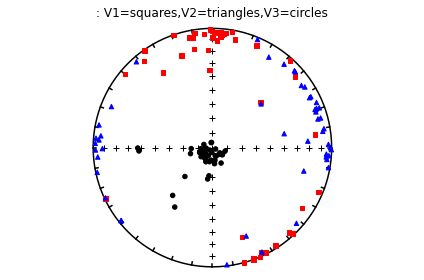

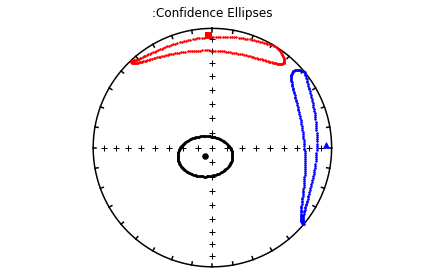

In [4]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=True,
                     save_plots=False)

### Plot by site with Hext ellipses

The above plot is all of the data from the study. However, in the Schwehr and Tauxe (2003) study the data are from three distinct sites:
- as1; they refer to this site as a cryptoslump and call it site B in the paper
- as2; they refer to this site as a slump and call it site C in the paper
-  as3; they refer this cite as undeformed and call it site A in the paper.

It therefore makes sense to plot the data by site since they have distinct behavoirs. We can plot the data by site by setting `isite=True`. The name of the site will be in the title of the plot.

(True, [])

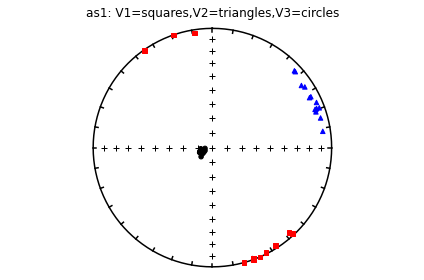

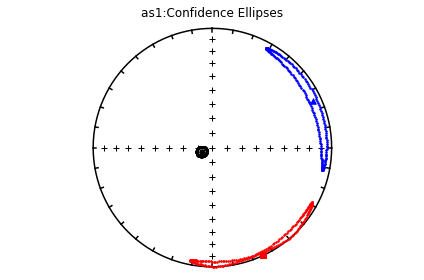

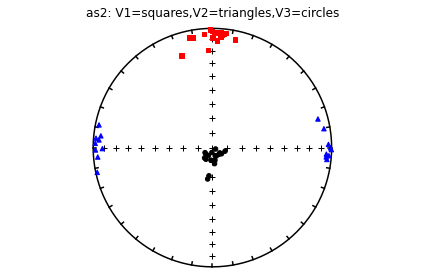

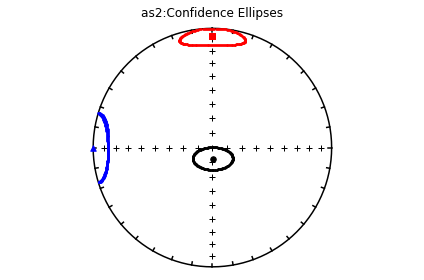

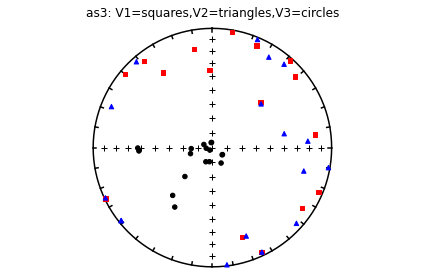

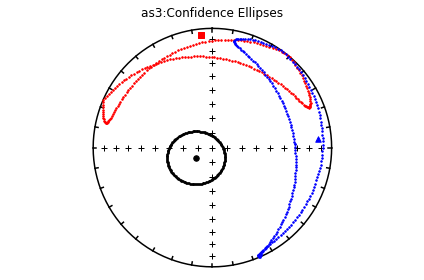

In [5]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=True,
                     isite=True,
                     save_plots=False)

### Plot by site with bootstrap uncertainty

Rather than using Hext ellipses, we can generate a plot with bootstrap resamples by setting `ivec=True`. 

This parameter choice will also lead to the generation of a plot of the bootstrap magnitudes of the mean eigenvalues associated with the eigenvectors. This approach enables the relative magnitudes to be compared. The relative magnitudes of these eigenvalues forms the basis of classifying the shape of the anisotropy ellisoid into these categories:
- spherical: $ \tau_1 \approx \tau_2 \approx \tau_3$
- oblate: $ \tau_1 \approx \tau_2 > \tau_3$
- prolate: $ \tau_1 > \tau_2 \approx \tau_3$
- triaxial: $ \tau_1 > \tau_2 > \tau_3$

Here is an example of an oblate ellipsoid where $\tau_3$ (which corresponds to the axis labeled $K_{min}$) is much smaller than $\tau_1$ and $\tau_2$ ($K_{max}$ and $K_{int}$).

<figure>
  <img src="https://raw.githubusercontent.com/PmagPy/RockmagPy-notebooks/main/book/images/AMS_oblate.png" alt="Ellipsoid with the principal axes labeled illustrating an oblate shape" width="450">
  <figcaption>from https://www.agico.cz/downloads/documents/agicoprints/ams_rocks_pres.pdf </figcaption>
</figure>

Site as3 (the unslumped sedimentary rocks of Schwehr and Tauxe, 2003) is a nice example of an oblate fabric. Once the code cell below is run, examine it and you will see that the plot of the cumulative distributions mean eigenvalues overlap for $\tau_1$ and $\tau_2$ while $\tau_3$ is significantly smaller. This fabric is characteristic of undeformed sedimentary rocks deposited under the influence of minimal paleocurrents.

(True, [])

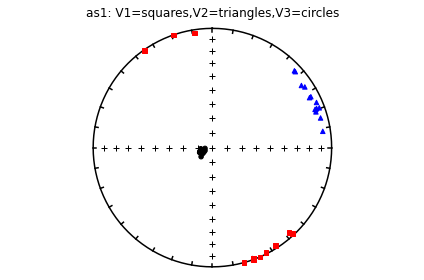

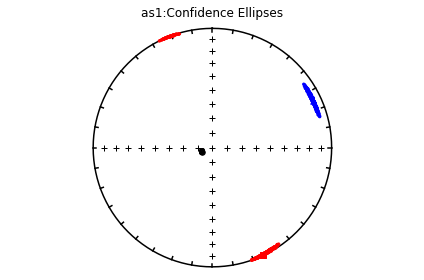

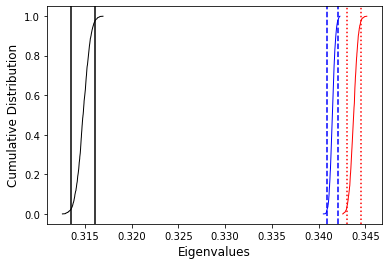

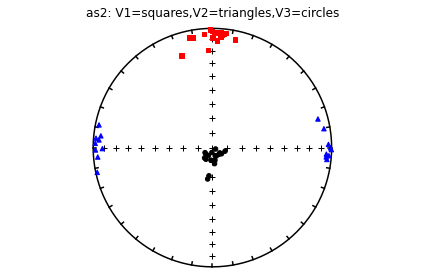

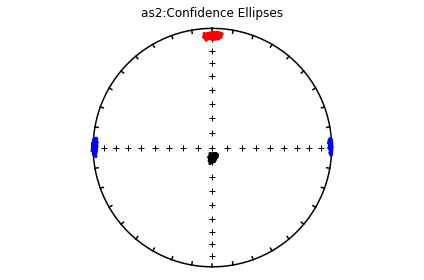

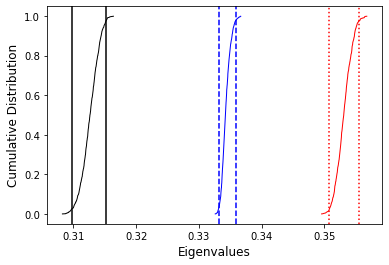

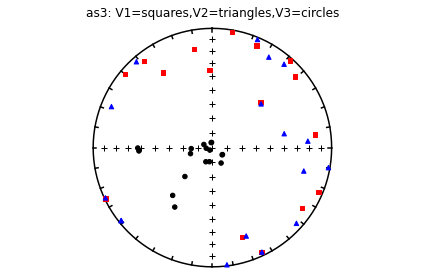

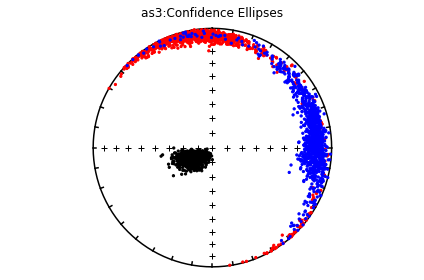

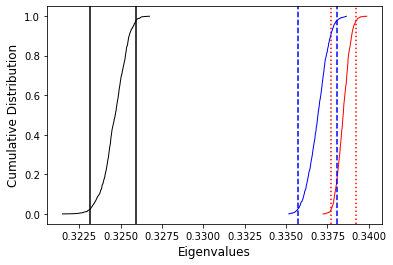

In [6]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     isite=True,
                     ivec=True,
                     save_plots=False)

#### Bootstrap ellipses

In the above plots, the parameter `ivec=True` resulted in the bootstrap resampled means being shown. Rather than plotting these means, the resulting 95% confidence ellipses associated with the bootstrap approach can be plotted by setting `iboot=True` and `ivec=False`. These ellipses are generated for each site in the code cell below.

(True, [])

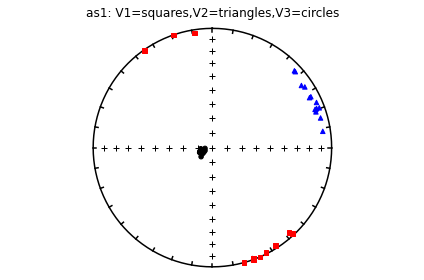

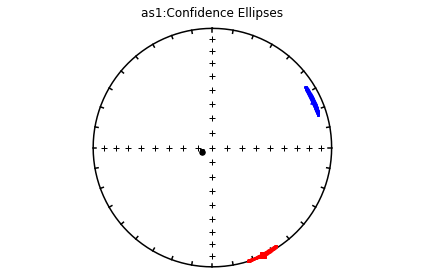

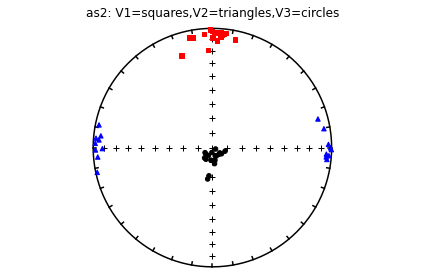

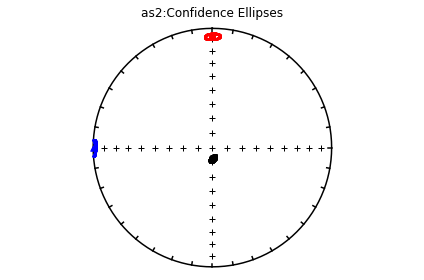

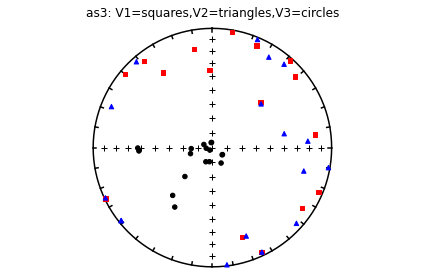

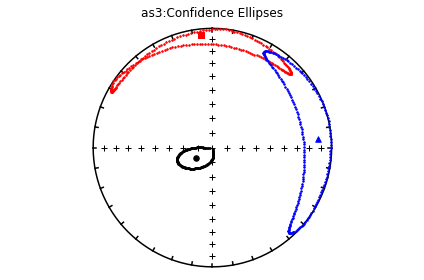

In [7]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     ivec=False,
                     isite=True,
                     save_plots=False)

Here are all of the parameters that can be used within the `ipmag.aniso_magic_nb()` function:

- `contribution`: pmagpy contribution_builder.Contribution object; if not provided will be created in directory (default: None). If provided, infile/samp_file/site_file may be left blank
- `infile`: Specimens formatted file with aniso_s data (default: 'specimens.txt')
- `samp_file`: Samples formatted file with sample => site relationship (default: 'samples.txt')
- `site_file`: Sites formatted file with site => location relationship (default: 'sites.txt')
- `verbose`: Boolean, if True, print messages to output (default: True)
- `ipar`: Confidence bound parameter; if True, perform parametric bootstrap - requires non-blank aniso_s_sigma (default: False)
- `ihext`: Confidence bound parameter; if True, Hext ellipses (default: True)
- `ivec`: Confidence bound parameter; if True, plot bootstrapped eigenvectors instead of ellipses (default: False)
- `isite`: Confidence bound parameter; if True, plot by site - requires non-blank samp_file (default: False)
- `iboot`: Confidence bound parameter; if True, bootstrap ellipses (default: False)
- `vec`: Eigenvector for comparison with Dir (default: 0)
- `Dir`: List of [Dec, Inc] for comparison direction (default: [])
- `PDir`: List of [Pole_dec, Pole_Inc] for pole to plane for comparison; green dots are on the lower hemisphere, cyan are on the upper hemisphere (default: [])
- `crd`: String, coordinate system for plotting ('s' for specimen coordinates, 'g' for geographic coordinates, 't' for tilt corrected coordinates) (default: 's')
- `num_bootstraps`: Integer, number of bootstraps to perform (default: 1000)
- `dir_path`: String, directory path (default: '.')
- `fignum`: Integer, matplotlib figure number (default: 1)
- `save_plots`: Boolean, if True, create and save all requested plots (default: True)
- `interactive`: Boolean, if True, interactively plot and display for each specimen (default: False)
- `fmt`: String, format for figures ('svg', 'jpg', 'pdf', 'png') (default: 'png')
